In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
training_data = datasets.MNIST(root=".", train=True, download=True, transform=ToTensor())

test_data = datasets.MNIST(root=".", train=False, download=True, transform=ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.1MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 469kB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.24MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.78MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
count_train = len(training_data)
count_test = len(test_data)

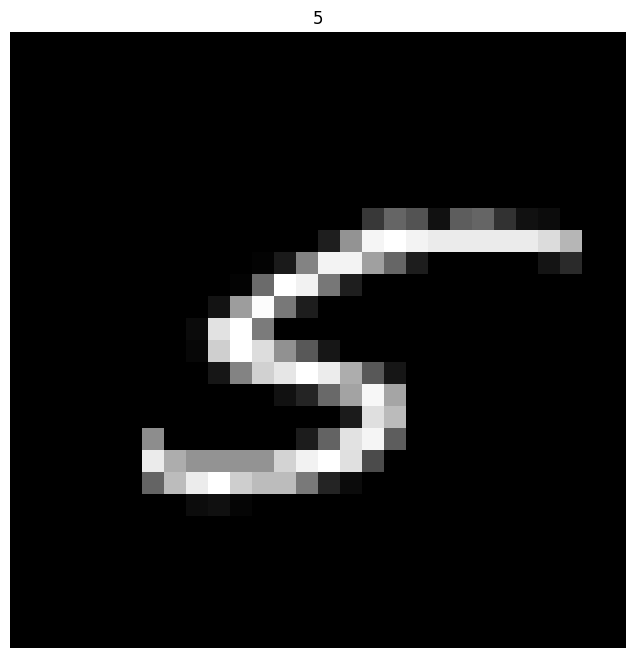

In [ ]:
## plot a random image from training data
fig1 = plt.figure(figsize=(8, 8))
sample_idx = torch.randint(len(training_data), size=(1,)).item()
img, label = training_data[sample_idx]
plt.title(label)
plt.axis("off")
plt.imshow(img.squeeze(), cmap="gray")

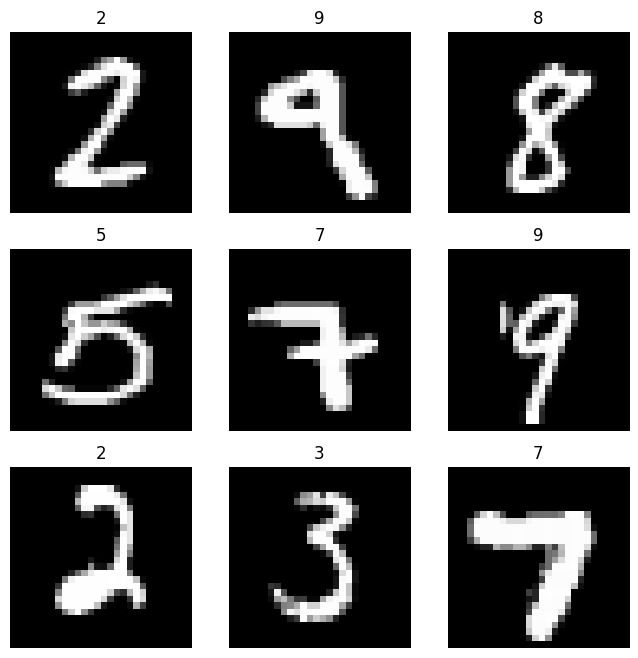

In [ ]:
## plot n*n random images from training data in a grid
n = 3
fig2 = plt.figure(figsize=(8, 8))
cols, rows = n, n

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(count_train, size=(1,)).item()
    img, label = training_data[sample_idx]
    ax2 = fig2.add_subplot(rows, cols, i)
    ax2.title.set_text(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
## use the DataLoader to iterate over the dataset in mini-batches

from torch.utils.data import DataLoader

loaded_train = DataLoader(training_data, batch_size=64, shuffle=True)
loaded_test = DataLoader(test_data, batch_size=64, shuffle=True)

In [ ]:
## Build Neural Networks
from torch import nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
##  instantiates  model:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
## Define Cross-entropy is a common loss function
loss_function = nn.CrossEntropyLoss()

In [ ]:
## set an optimization algorithm
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), learning_rate)

In [ ]:
## Training the Neural Network
## looping through the data one batch at a time, using the optimizer to adjust the model, and computing the prediction and the loss
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X)
        train_loss = loss_fn(pred, y)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if batch:
            train_loss, current = train_loss.item(), batch * len(X)
            print(f"Training loss: {train_loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
## test function, which computes the accuracy and the loss
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    return test_loss, correct

In [ ]:
## run the model
epochs = 4
for t in range(epochs): ## set number of epochs
    train(loaded_train, model, loss_function, optimizer)
    test_loss, correct = test(loaded_test, model, loss_function)
    print('\n Finished Epoch: ' , (t+1))
    print ("--------------------------------------------")

Training loss: 2.259551  [   64/60000]
Training loss: 2.270809  [  128/60000]
Training loss: 2.242649  [  192/60000]
Training loss: 2.260238  [  256/60000]
Training loss: 2.253704  [  320/60000]
Training loss: 2.255743  [  384/60000]
Training loss: 2.261823  [  448/60000]
Training loss: 2.250483  [  512/60000]
Training loss: 2.249640  [  576/60000]
Training loss: 2.259945  [  640/60000]
Training loss: 2.260254  [  704/60000]
Training loss: 2.250154  [  768/60000]
Training loss: 2.257313  [  832/60000]
Training loss: 2.266354  [  896/60000]
Training loss: 2.261247  [  960/60000]
Training loss: 2.263268  [ 1024/60000]
Training loss: 2.255866  [ 1088/60000]
Training loss: 2.257094  [ 1152/60000]
Training loss: 2.252412  [ 1216/60000]
Training loss: 2.258961  [ 1280/60000]
Training loss: 2.261002  [ 1344/60000]
Training loss: 2.260253  [ 1408/60000]
Training loss: 2.262609  [ 1472/60000]
Training loss: 2.261450  [ 1536/60000]
Training loss: 2.256626  [ 1600/60000]
Training loss: 2.261574  

In [ ]:
accuracy = correct*100
print('Number of training images = ' , count_train)
print('Number of testing images = ' , count_test)
print('Training data classes')
print(training_data.classes) #classes inside the data:
print("Accuracy = %.2f %%" %(accuracy))
print("Average loss = %.2f" %(test_loss))

Number of training images =  60000
Number of testing images =  10000
Training data classes
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
Accuracy = 72.76 %
Average loss = 1.61
